# Dashboards en Python

In [20]:
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

peliculas = pd.read_csv('RatingsPeliculas.csv')
peliculas.columns = ['Pelicula', 'Genero', 'RatingsCriticos', 'RatingsAudiencia', 'PresupuestoMillones', 'Año']

peliculas.Pelicula = peliculas.Pelicula.astype('category')
peliculas.Genero = peliculas.Genero.astype('category')
peliculas.Año = peliculas.Año.astype('category')
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


---

In [25]:
# Dashboard: combinación de gráficos o sets de información

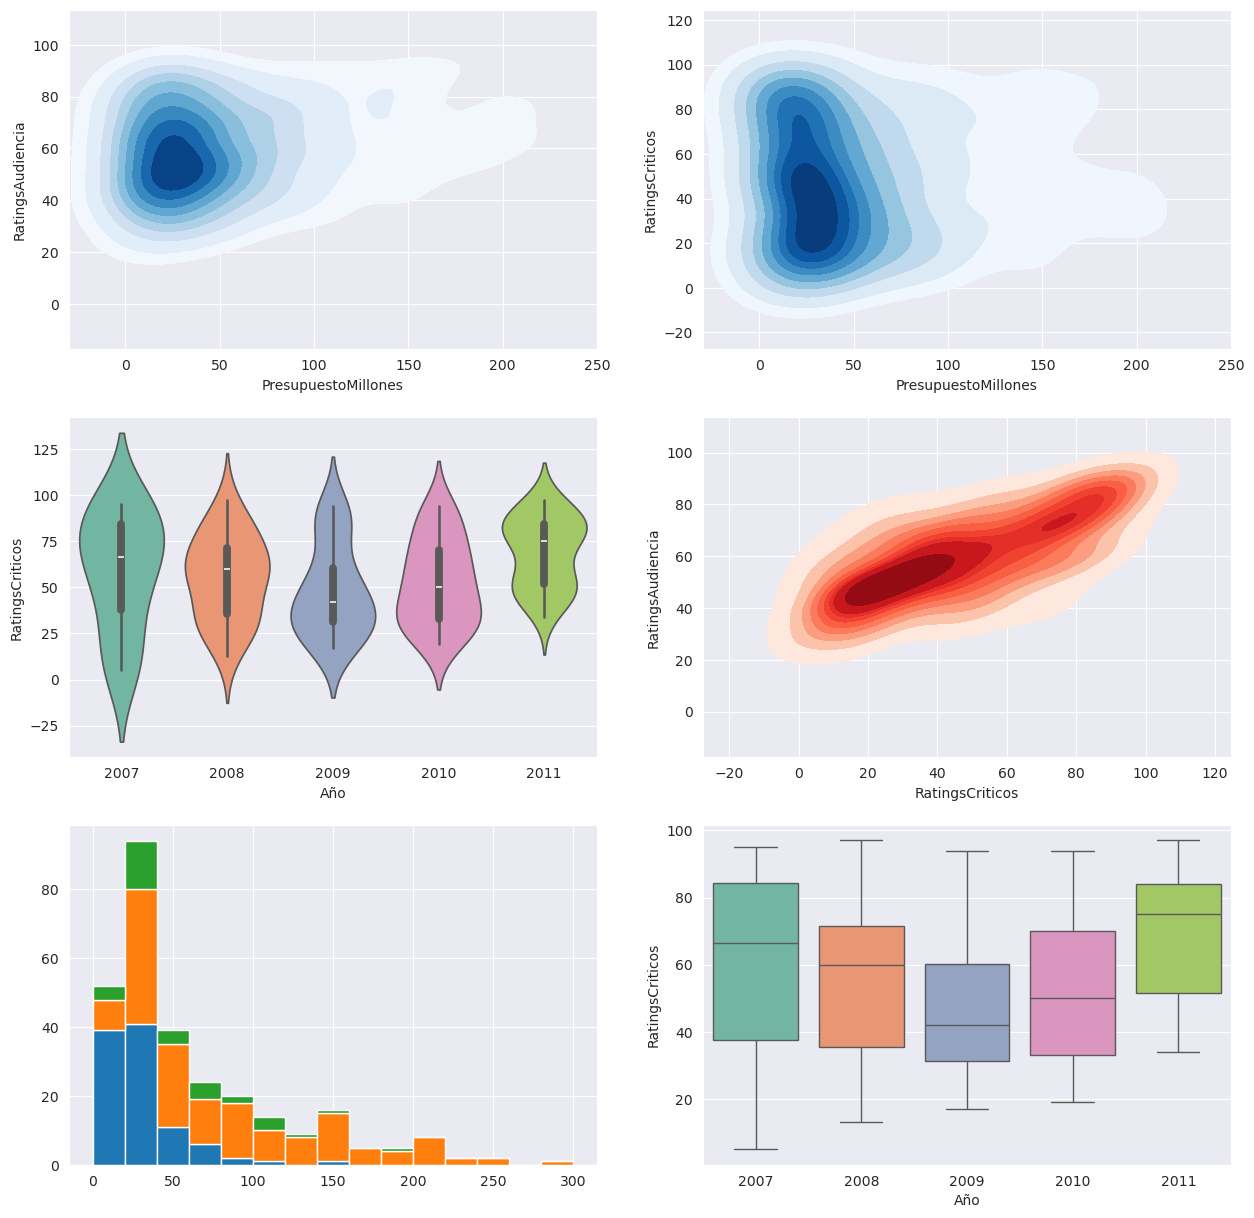

In [61]:
sns.set_style("darkgrid")
f, ax = plt.subplots(3,2,figsize=(15, 15))

# Gráfico 1 
k1 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, data=peliculas,
                 shade=True, shade_lowest=False, cmap="Blues", ax=ax[0,0])

# Gráfico 2
k2 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, data=peliculas,
                 shade=True, shade_lowest=False, cmap="Blues", ax=ax[0,1])

# Gráfico 3
z = sns.violinplot(data=peliculas[peliculas.Genero == 'Drama'], x="Año", y="RatingsCriticos", palette="Set2", ax=ax[1,0])

# Gráfico 4
k3 = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, \
                 shade=True, shade_lowest=False, cmap="Reds", ax=ax[1,1])

# Gráfico 5 - IMPORTANTE
## Para agregar gráficos que no sean se Seaborn el método es distinto.
ax[2,0].hist([
        peliculas[peliculas.Genero == "Drama"].PresupuestoMillones , 
        peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, 
        peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones], 
        bins=15, 
        stacked=True)

# Gráfico 6
box = sns.boxplot(x="Año", y="RatingsCriticos", data=peliculas[peliculas.Genero == 'Drama'], palette="Set2", ax=ax[2,1])


k1.set(xlim=(-30,250))
k2.set(xlim=(-30,250))

plt.show()

---

# Tips para dar Estilo

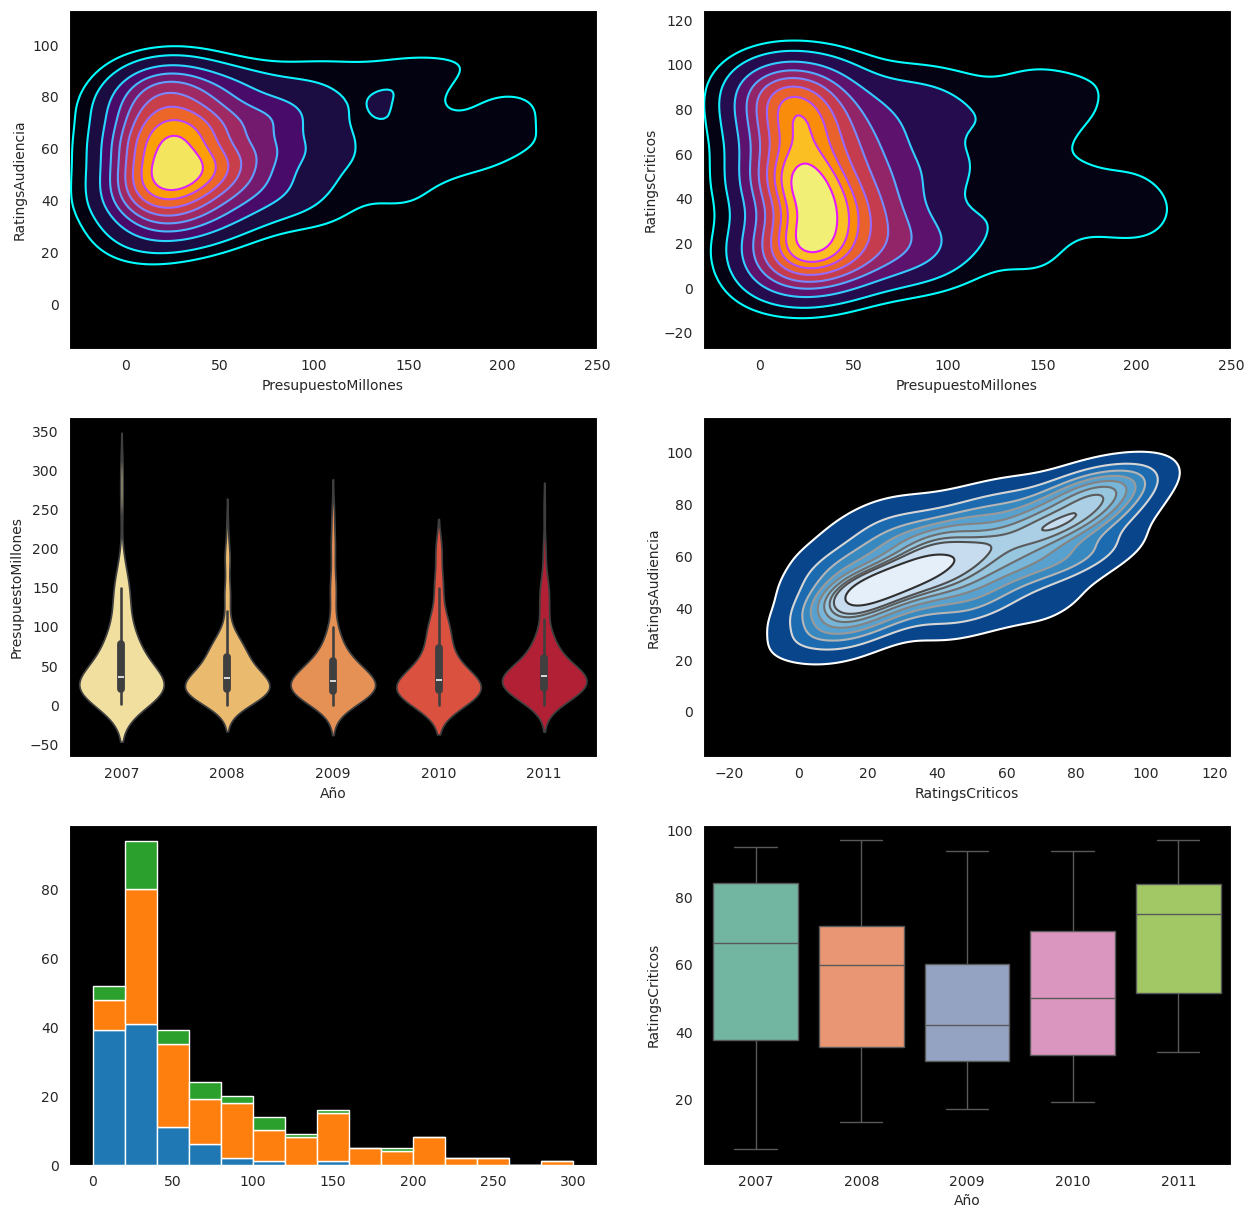

In [73]:
sns.set_style("dark", {'axes.facecolor':'black'}) # white, whitegrid, dark, darkgrid, ticks
f, ax = plt.subplots(3,2,figsize=(15, 15))

#Gráfico [0,0]
k1 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, data=peliculas, \
                 shade=True, shade_lowest=False, cmap="inferno", ax=ax[0,0])
k1b = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, data=peliculas, \
                  cmap="cool", ax=ax[0,0])

# Gráfico [0,1]
k2 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, data=peliculas, \
                 shade=True, shade_lowest=False, cmap="inferno", ax=ax[0,1])
k2b = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, data=peliculas, \
                  cmap="cool", ax=ax[0,1])

# Gráfico [1,0]
z = sns.violinplot(data=peliculas, x="Año", y="PresupuestoMillones", palette="YlOrRd", ax=ax[1,0])

# Gráfico [1,1]
k3 = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, 
                 shade=True, shade_lowest=False, cmap="Blues_r", ax=ax[1,1])
k3b = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, 
                 cmap="gist_gray_r", ax=ax[1,1])

# Gráfico [2,0]
ax[2,0].hist([
        peliculas[peliculas.Genero == "Drama"].PresupuestoMillones , 
        peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, 
        peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones], 
        bins=15, 
        stacked=True)

# Gráfico [2,1]
box = sns.boxplot(x="Año", y="RatingsCriticos", data=peliculas[peliculas.Genero == 'Drama'], palette="Set2", ax=ax[2,1])


k1.set(xlim=(-30,250))
k2.set(xlim=(-30,250))

plt.show()

---

# Más detalles

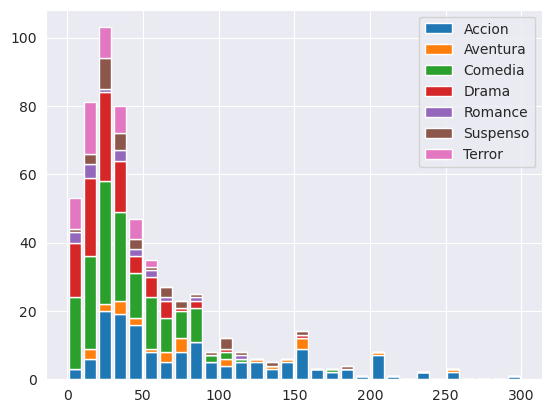

In [85]:
lista_gen = []
etiquetas = []

for gen in peliculas.Genero.cat.categories:
    lista_gen.append(peliculas[peliculas.Genero == gen ].PresupuestoMillones)
    etiquetas.append(gen)
    
h = plt.hist(lista_gen, bins=30, stacked=True, rwidth=0.8, label=etiquetas)
plt.legend()
plt.show()

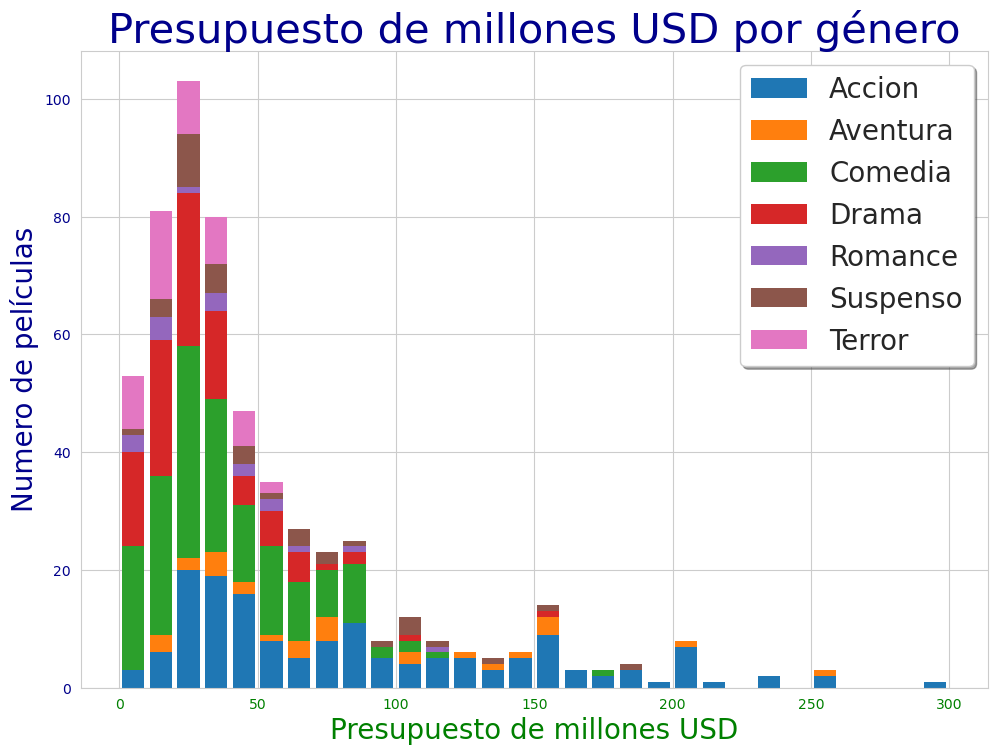

In [101]:
sns.set_style("whitegrid")

lista_gen = []
etiquetas = []

for gen in peliculas.Genero.cat.categories:
    lista_gen.append(peliculas[peliculas.Genero == gen ].PresupuestoMillones)
    etiquetas.append(gen)
    
# Uso de un subplot para que el histograma se vea mejor
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11.7, 8.27) #Tamaño de una hoja A4
    
h = plt.hist(lista_gen, bins=30, stacked=True, rwidth=0.8, edgecolor='none', label=etiquetas)
plt.title('Presupuesto de millones USD por género', fontsize=30, color='DarkBlue')
plt.ylabel('Numero de películas', fontsize=20, color='DarkBlue')
plt.xlabel('Presupuesto de millones USD', fontsize=20, color='Green')
plt.xticks(fontsize=10, color='Green')
plt.yticks(fontsize=10, color='DarkBlue')
plt.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, prop={"size":20})
plt.show()